## Pododdelek za spodbujanje kolesarjenja

Rezultati več let trajajoče študije Oddelka za motorni promet in gospodarske dejavnosti MOL so pokazali, da ljubljanske kolesarje najbolj moti to, da jih nihče ne spodbuja h kolesarjenju. Zato so ustanovili Pododdelek za spodbujanje kolesarjenja. Da bi dokazali svojo resnost, so na pododdelku tako zaposlili 16 resnih ljubiteljev kolesarjenja: vsi trije redno spremljajo televizijske prenose dirk, znajo našteti vse tri slovenske kolesarje (menda "*Rogljič, Pogačnik in tisti na M*"), poleg tega pa so obljubili, da se bodo v najkrajšem času tudi sami naučili dejansko voziti kolo. (Za to jim bo MOL tudi priskrbela službena kolesa, da se ne bodo vozili z lastnimi, saj jih nimajo.)

Še več, dogovorili so se, kdo se bo naučil katero od veščin, potrebnih za kolesarjenje po Ljubljani. Na osnovi tega in drugih lastnosti so sestavili organigram, kdo bo šef komu. Nekateri imajo tudi več šefov. Organigram vidimo na sliki; poleg vsakega imena so zapisane klasične veščine iz drugih nalog, poleg tega pa Ana in Jana (v resnici vzdevka - gre za naši znanki iz drugih nalog, Angelco in Johanco) obvladata še marketing in računovodstvo, ker "*ne morejo vsi samo kolesariti*" (je rekla Angelca).



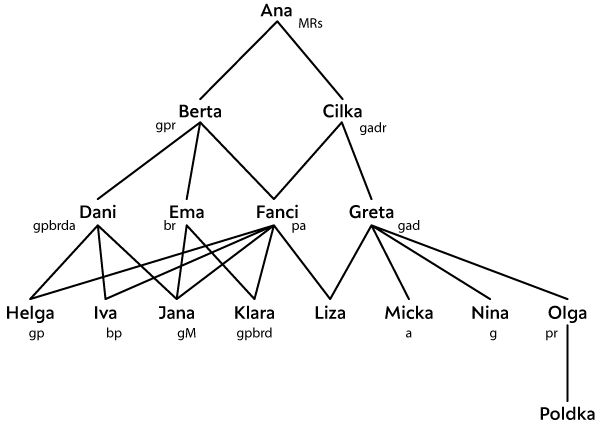


Skoraj vse funkcije, ki jih boste napisali, bodo prejele dva argumenta, nekatere pa še tretjega.
- `organigram` je slovar, katerega ključi so imane "šefov", vrednosti pa množice njihovih podrejenih. Ključu `"Berta"` pripada množica `{"Dani", "Ema", "Fanci"}`. Slovar vsebuje tudi imena tistih, ki nimajo podrejenih; pripadajoča vrednost je prazna množica.
- `dezorganigram` je slovar, katerega ključi so imena delavcev, pripadajoče množice pa imena njihovih šefov. Ključu `"Fanci"` pripada vrednost `{"Berta", "Cilka"}`.
- `vescine` je slovar, katerega ključi so imena, vrednosti pa veščine, ki jih toimenska oseba obvlada. Ključu `"Ema"` pripada `{"bolt", "robniki"}`.

Katere podatke uporabite in kako - je vaša stvar.


## Ocena 6

Napišite naslednje funkcije.

- `lojalisti(organigram, dezorganigram, sef)` vrne imena vseh oseb, ki so podrejene podani osebi `sef` in razen njega nimajo drugih šefov.
- `shizofreniki(organigram, dezorganigram)` vrne množico imen oseb, ki imajo več kot enega šefa.
- `multipraktik(organigram, dezorganigram)` vrne osebo, ki ima največ šefov. Če je takih oseb več, vrne poljubno izmed njih.
- `butli(organigram, dezorganigram, vescine)` vrne množico imen oseb, ki ne obvladajo nobene veščine.

### Rešitev

Naloge za oceno 6 so v bistvu preverjale, ali znamo delati z zankami in pogoji. Slovarji so bili tu le zato, da smo imeli na čem pognati zanko. V resnici jih (vsaj v zglednih rešitvah) niti ne uporabimo kot slovarje temveč le kot sezname parov, saj gremo (v spodnih rešitevah) vedno z zanko prek `items()`, nikoli pa ne uporabimo indeksiranja. V množice pa v teh rešitvah tudi le dodajamo stvari.

### `lojalisti`

Funkcijo se da seveda poljubno zaplesti. Ena preprostejših rešitev pa je

In [1]:
def lojalisti(organigram, dezorganigram, sef):
    lojalni = set()
    for delavec, sefi in dezorganigram.items():
        if sefi == {sef}:
            lojalni.add(delavec)
    return lojalni

Gremo čez `dezorganigram`, saj nam ta za vsako osebo pove, kdo so njegovi šefi. Ker bomo potrebovali oboje - tako imena oseb kot množice šefov, gremo čez `dezorganigram.items()`. Če se izkaže, da je množica šefov neke osebe enaka množici, ki vsebuje le šefa, po katerem sprašujemo, dodamo tega delavca v množico lojalnih.

Krajše pa tako:

In [2]:
def lojalisti(organigram, dezorganigram, sef):
    return {delavec for delavec, sefi in dezorganigram.items() if sefi == {sef}}

Če bi hoteli v tej funkciji uporabiti `organigram`, bi v bistvu (delno) sprogramirali funkcijo, ki iz organigrama naredi dezorganigram.

### `shizofreniki`

Stvar je na las podobna, le da tokrat ne preverjamo `sefi == {sef}` temveč `len(sefi) > 1`. Rešitev je torej enaka gornji, le z drugačnim pogojem.

In [3]:
def shizofreniki(organigram, dezorganigram):
    return {delavec for delavec, sefi in dezorganigram.items() if len(sefi) > 1}

### `multipraktik`

Tole je klasika domačih (in izpitnih) nalog: iskanje maksimalnega elementa glede na določen ključ. Rešimo na dolgo

In [4]:
def multipraktik(organigram, dezorganigram):
    naj_sefov = None
    naj_delavec = None
    for delavec, sefi in dezorganigram.items():
        if naj_sefov is None or len(sefi) > naj_sefov:
            naj_sefov = len(sefi)
            naj_delavec = delavec
    return naj_delavec

ali, v letih, v katerih mimogrede izvemo za to, kaj se da početi z `max` in morda celo za `lambda`-funkcije, na kratko:

In [5]:
def multipraktik(organigram, dezorganigram):
    return max(dezorganigram, key=lambda x: len(dezorganigram[x]))

### `butli`

Tokrat nas (dez)organigram seveda ne zanima; uporabimo le `vescine`.

In [6]:
def butli(organigram, dezorganigram, vescine):
    neznalci = set()
    for delavec, zna in vescine.items():
        if not zna:
            neznalci.add(delavec)
    return neznalci

Krajše pa

In [7]:
def butli(organigram, dezorganigram, vescine):
    return {delavec for delavec, zna in vescine.items() if not zna}

## Ocena 7

Napišite naslednje funkcije.

- `dezorganigram(organigram)` prejme `organigram` in vrne ustrezen `dezorganigram`. (Ali, če razmislite, tudi obratno. :)
- `kolegi(organigram, dezorganigram, delavec)` vrne imena vseh, ki delajo za istega šefa kot podani `delavec`. Če ima `delavec` več šefov, vrne vse, ki delajo za kateregakoli od njih.
- `sefi(organigram, dezorganigram)`: pravi šef, je tisti, ki ima največ podrejenih, ki delajo samo za njega. Pravi šef je Greta, saj ima tri podrejene, ki delajo samo zanjo. Če da, recimo, Nina odpoved, pa bodo pravi šefi Ana, Berta in Greta, saj bodo imeli po dva podrejena, ki delata samo zanju. Funkcija `sefi` mora vrniti množico vseh pravih šefov.

### Rešitev

Naloge za oceno 7 so bile naloge iz množic in slovarjev.

### `dezorganigram`

Naloga sicer ni težka, popaziti pa moramo, da v slovar dodamo vse, kar je potrebno. Nekoliko nerodnejša rešitev je:

In [8]:
def dezorganigram(organigram):
    obratni = {}
    for sef, podrejeni in organigram.items():
        if sef not in obratni:
            obratni[sef] = set()
        for delavec in podrejeni:
            if delavec not in obratni:
                obratni[delavec] = set()
            obratni[delavec].add(sef)
    return obratni

Vrstica `obratni[sef] = set()` je potrebna zato, ker se morajo v obratnem slovarju pojaviti tudi tisti, ki nastopajo le kot šefi. To je, v našem primeru, Ana: v dezorganigramu mora biti tudi ključ Ana, pripada pa mu prazna množica, ker Ana nima šefa. Če bi nove elemente dodajali le v vlogi delavcev, bi Ano izpustili. Pogoj `if sef not in obratni` pa je seveda potreben zato, da ne bi v primeru, da smo nekoga, ki je že nastopil kot delavec in ima že kakega šefa, dodali na novo in s tem pobrisali njegove dosedanje šefe.

Druga zanka je očitna: gremo čez vse delavce, ki so podrejeni nekemu šefu, in v slovar v množico, ki pripada ključu z imenom delavca, dodamo šefa, `obratni[delavec].add(sef)`. Če tega ključa poprej še ni bilo, ga seveda dodamo, `if delavec not in obratni: obratni[delavec] = set()`.

Rešitev resnejšega programerja v Pythonu je

In [9]:
def dezorganigram(organigram):
    obratni = collections.defaultdict(set)
    for sef, podrejeni in organigram.items():
        obratni.setdefault(sef, set())
        for delavec in podrejeni:
            obratni[delavec].add(sef)
    return obratni

S tem, ko uporabimo `collections.defaultdict(set)` namesto običajnega slovarja, `{}`, se bodo novi elementi pojavljali sami in ni več potrebe po `if delavec not in obratni: obratni[delavec] = set()`.

Metoda `d.setdefault(key, value)` pa v slovar `d` doda ključ `key` z vrednostjo `value`, če ta še ni obstajal. Če je, pa ne naredi ničesar. Natančno to, kar potrebujemo.

Ker imamo `defaultdict`, deluje tudi tole:

In [10]:
def dezorganigram(organigram):
    obratni = collections.defaultdict(set)
    for sef, podrejeni in organigram.items():
        for delavec in podrejeni:
            obratni[delavec].add(sef)
    return obratni

Tu smo namesto `obratni.setdefault(sef, set())` napisali `obratni[sef]`. Stranski učinek tega, da poizvedujemo po ključu, ki ga morda ni, je, da se ta ključ pojavi. To je čudno. PyCharm to označi s *Statement seems to have no effect*, tudi lint se najbrž pritožuje... Programerja (tudi izkušenega) to zmede. To je res eden od načinov, na katere se da dodati ta ključ, vendar je neobičajen; običajen način za dodajanje ključa, če ga še ni, je `setdefault`, indeksiranje, se pravi `obratni[sef]` pa uporabimo, kadar nas dejansko zanima vrednost, ne pa, kadar bi radi dosegli zgolj stranski učinek.

### `kolegi`

Vrniti moramo unijo množic ljudi, ki so podrejeni šefom tega delavca - razen njega samega.

In [11]:
def kolegi(organigram, dezorganigram, delavec):
    sodelavci = set()
    for sef in dezorganigram[delavec]:
        sodelavci |= organigram[sef]
    return sodelavci - {delavec}

Gremo torej čez vse šefe - dobimo jih v `dezorganigramu`. V `sodelavci` priunijamo podrejene vsakega od teh šefov - dobimo jih v `organigramu`. Na koncu vrnemo to unijo, le `{delavec}` odštejemo od nje.

V letih, ko izčvekam kaj več o unijah in drugih čudnih stvareh, pa znamo to rešiti takole

In [12]:
def kolegi(organigram, dezorganigram, delavec):
    return set().union(*(organigram[sef] for sef in dezorganigram[delavec])) - {delavec}

### `sefi`

Tudi to ni neobičajna naloga: iskanje maksimalnega elementa glede na določen kriterij (tule: glede na število podrejenih), pri čemer pa moramo v primeru, da je enako maksimalnih elementov več, vrniti vse.

In [13]:
def sefi(organigram, dezorganigram):
    naj = -1
    sefi = set()
    for sef in organigram:
        mojih = len(lojalisti(organigram, dezorganigram, sef))
        if mojih > naj:
            sefi = {sef}
            naj = mojih
        elif mojih == naj:
            sefi.add(sef)
    return sefi

`naj` bo največje število podrejenih, `sefi` pa množica tistih, ki imajo toliko (torej: `naj`) podrejenih.

Gremo čez organigram. Za vsakega izvemo, koliko *lojalistov* ima (če ne uporabite funkcije `lojalisti`, ste si sami krivi, da je funkcija postala zapletena čez vsako mero). Če je število lojalistov večje od največjega doslej, je ta šef edini največji šef (doslej), `sefi = {sef}` in `naj` je seveda število njegovih lojalistov. Če pa je število lojalistov enako največjemu doslej, se ta šef pridruži trenutnim največjim šefom, `sefi.add(sef)`.

Razlika je v tem, da v prvem primeru začnemo množico znova, zgolj s tem šefom, v drugem pa ga dodamo vanjo.

## Ocena 8

Napišite naslednje funkcije.

- `zapisi(organigram, vescine, ime_datoteke)` v datoteko z imenom `ime_datoteke` zapiše podatke o zaposlenih. Vsaka vrstica vsebuje ime zaposlenega, sledi podpičje, nato so naštete vse veščine (ločene z vejicami), nato vsi podrejeni, ločeni z vejicami. Vsa imena in vse veščine morajo biti urejene po abecedi. Za podpičji in vejicami je lahko (en) presledek, lahko pa ga tudi ni - kot želite.

    Za organigram na sliki se datoteka začne takole:

    ```
    Ana; marketing, racunovodstvo, stopnice; Berta, Cilka
    Berta; gravel, pesci ,robniki; Dani, Ema, Fanci
    Cilka; avtocesta, gravel, robnik, rodeo; Fanci, Greta
    ```

- `preberi(ime_datoteke)` prebere podatke o zaposlenih iz datoteke z imenom `ime_datoteke` in vrne par slovarjev - organigram in veščine.



### Rešitev

Tole je, očitno, naloga iz nizov in datotek. Filozofirati ni kaj dosti. Ena, kar kratka, rešitev je

In [14]:
def preberi(ime_datoteke):
    organigram = {}
    vescine = {}
    for vrstica in open(ime_datoteke):
        sef, vvescine, delavci = vrstica.strip().split(";")
        organigram[sef] = set(delavci.strip().split(", ")) if delavci.strip() else set()
        vescine[sef] = set(vvescine.strip().split(", ")) if vvescine.strip() else set()
    return organigram, vescine

def zapisi(organigram, vescine, ime_datoteke):
    f = open(ime_datoteke, "w")
    for sef, delavci in organigram.items():
        f.write(f"{sef}; {', '.join(sorted(vescine[sef]))}; {', '.join(sorted(delavci))}\n")

Dva trika sta vredna omembe.

Ker vemo, da bo vrstica sestavljena iz treh elementov, ločenih s `;`, lahko rezultate `split`-a priredimo trem spremenljivkam, `sef, vvescine, delavci = vrstica.strip().split(";")`.

Drugi: niz `delavci` najprej oluščimo presledkov, potem pa razdelimo glede na vejico. Rezultat `split`-a je seznam, naloga pa zahteva množico, zato seznam pretvorimo v `set`: `set(delavci.strip().split(", "))`. Sitnost pa je v tem, da bo v primeru, da je `delavci.strip()` prazen, klic `delavci.strip().split(", ")` vrnil `[""]` in množica ne bo prazna, temveč bo vsebovala prazen niz `{""}`. Tega se rešimo tako, da v primeru, ko je `delavci.strip()` prazen, vrnemo `set()`. Kako to storiti, vidimo zgoraj.

Tu je sicer moteče, da dvakrat kličemo `delavci.strip()` (in, kasneje, `vvescine.strip()`). Obstaja način, kako se temu izogniti, vendar je tako neestetski, da imam raje dvojni klic `strip`, saj ta navsezadnje ne vzame toliko časa:

```python
        organigram[sef] = set(sd.split(", ")) if (sd := delavci.strip()) else set()
        vescine[sef] = set(sv.split(", ")) if (sv := vvescine.strip()) else set()
```

Druga možnost je, da od množice, ki jo vrne `set(...split(", ")` odštejemo prazen niz:

```python
        organigram[sef] = set(delavci.strip().split(", ")) - {""}
        vescine[sef] = set(vvescine.strip().split(", ")) - {""}
```

To sicer deluje, vendar mi je od vseh treh različic še najmanj všeč: prvi dve povesta, v kakšni situaciji dobimo ta nesrečni prazni niz, ki se ga je treba znebiti. V zadnji ni jasno, kako pride do njega, poleg tega pa nikakor ni očitno, da je v tem primeru prazni niz tudi edini element množice in da z odštevanjem tu pravzprav dobimo prazno množico.

Seveda obstaja tudi zgledna rešitev,

In [15]:
def preberi(ime_datoteke):
    organigram = {}
    vescine = {}
    for vrstica in open(ime_datoteke):
        sef, vvescine, delavci = vrstica.strip().split(";")
        delavci = delavci.strip()
        if delavci:
            organigram[sef] = set(delavci.strip().split(", "))
        else:
            organigram[sef] = set()
        vvescine = vvescine.strip()
        if vvescine:
            vescine[sef] = set(vvescine.strip().split(", "))
        else:
            vescine[sef] = set()
    return organigram, vescine

vendar za take res nimam potrpljenja. (Osebno: to je v resnici lepše, vendar mi branje tega vzame več časa kot branje prve ali druge.)

## Ocena 9

**Za oceno 9 za začetek poskrbi, da bodo vsaj tri od štirih funkcij za oceno 6 napisane v eni vrstici, s primernimi izpeljanimi množicami.**

Nato napiši naslednje funkcije:

- `samodrzci(organigram, dezorganigram, vescine)` vrne množico imen šefov, ki znajo kaj, česar ne zna nihče od njihovih neposredno podrejenih. Eden od njih je, recimo, Cilka, ki zna voziti čez robnike, česar ne znata na Fanči na Greta.
- `samouki(organigram, dezorganigram, vescine)` vrne množico imen oseb, ki obvladajo kaj, česar ne zna nobeden od njihovih šefov. Klara, recimo, je samouk, ker obvalada rodeo (d), česar ne znata ne Ema ne Fanči.
- `ucenjaki(organigram, dezorganigram, vescine)` vrne množico imen oseb, ki obvladajo vse, kar obvladajo vsi njihovi kolegi. Dani je učenjak, ker obvlada vse, kar obvladata Ema in Fanči.


### Rešitev

Za prvi del smo poskrbeli že sproti: v eni vrstici smo napisali vse štiri funkcije. Za študente je bilo mišljeno, da napišejo prvo, drugo in četrto, ki zahtevata le običajne generatorske izraze in ne tretje, ki zahteva še lambda-funkcije.

Ostale naloge so malo naprednejše naloge iz dela z množicami. Pa slovarji, seveda, tudi.

### `samodrzci`

In [16]:
def samodrzci(organigram, dezorganigram, vescine):
    samo = set()
    for sef, podrejeni in organigram.items():
        if not podrejeni:
            continue
        moje = vescine[sef].copy()
        for delavec in podrejeni:
            moje -= vescine[delavec]
        if moje:
            samo.add(sef)
    return samo

Gremo čez organigram. Če nekdo nima podrejenih, nas ne zanima - `if not podrejeni: continue`. Namesto `continue` bi lahko pisali tudi `if podrejeni:` in potem zamaknili vso ostalo vsebino zanke. Meni je ljubše uporabiti `continue`, ker ga razumem kot *ta me ne zanima, vzemi naslednjega*.

Nato naredimo kopijo množice podrejenih. To je pomembno, saj bomo to množico spreminjali. Če ne naredimo kopije, dobimo novo "puščico" na množico, ki je shranjena v slovarju `vescine` in bomo tako dejansko spreminjali ta slovar (oziroma njegovo vsebino).

Nato gremo čez vse podrejene, da iz množice odstranimo vse, kar zna kateri od podrejenih. Če množica na koncu ni prazna, dodamo šefa med samodržce.

Enovrstična rešitev je

In [17]:
def samodrzci(organigram, dezorganigram, vescine):
    return {sef
            for sef, podrejeni in organigram.items()
            if podrejeni and vescine[sef] - set().union(*(vescine[delavec] for delavec in podrejeni))}

### `samouki`

To je natančno isto, le v drugo smer. Se pravi: le namesto organigrama uporabimo dezorganigram.

In [18]:
def samouki(organigram, dezorganigram, vescine):
    samo = set()
    for sef, podrejeni in dezorganigram.items():
        moje = vescine[sef].copy()
        for delavec in podrejeni:
            moje -= vescine[delavec]
        if moje:
            samo.add(sef)
    return samo

Funkcijo sem kar skopiral (zato ima malo napačna imena spremenljivk - `sef` in `podrejeni` bi moral preimenovati v `delavec` in `nadrejeni`, vendar puščam enako, da vidimo, kako ista funkcija je to). Le nekaj sem moral odstraniti: tisti `if` in `continue` na začetku. Prej smo preverjali, da nekdo nima podrejenih, zdaj pa nas ne moti, če nima šefov.

To je razlog, da spodnja rešitev žal ne deluje:

In [19]:
def samouki(organigram, dezorganigram, vescine):
    return samodrzci(dezorganigram, organigram, vescine)

Njena ideja je lepa in zvita: če sta funkciji enaki, le da `orgranigram` zamenjamo z `dezorgranigram`, lahko `samouki` preprosto pokliče `samodrzci` z zamenjanimi argumenti. Vendar ... žal ne, ker bo izpustilo šefe. Te lahko sicer dodamo naknadno,

In [20]:
def samouki(organigram, dezorganigram, vescine):
    return samodrzci(dezorganigram, organigram, vescine) \
           | {delavec for delavec, sefi in dezorganigram.items() if not sefi and vescine[delavec]}

tako da dodamo vse, ki nimajo nadrejenih in kaj znajo. Vendar, no, škoda.

### `ucenjaki`

Tole je spet podobno, le da gremo tokrat prek kolegov, ne podrejenih ali nadrejenih. Poleg tega nas ne zanima, ali delavec zna kaj, česar ne znajo drugi, temveč, ali zna vse in še več. Torej ne bomo odštevali množic, temveč iskali nadmnožice.

In [21]:
def ucenjaki(organigram, dezorganigram, vescine):
    ucen = set()
    for delavec in organigram:
        znajo = set()
        for kolega in kolegi(organigram, dezorganigram, delavec):
            znajo |= vescine[kolega]
        if vescine[delavec] >= znajo:
            ucen.add(delavec)
    return ucen

Spet gre tudi krajše, če znamo računati unije.

In [22]:
def ucenjaki(organigram, dezorganigram, vescine):
    return {delavec
            for delavec in organigram
            if vescine[delavec] >= set().union(
                *(vescine[kolega] for kolega in kolegi(organigram, dezorganigram, delavec))
            )}

## Ocena 10

Napišite naslednje funkcije.

- `nivo(organigram, dezorganigram, delavec)` vrne nivo osebe v hierarhiji. Nivo Ane je 0, nivo Berte je 1, nivo Fanči je 2 ...
- `stevilo_nivojev(organigram, dezorganigram)` vrne število nivojev v hierarhiji. Za primer na sliki vrne 4.
- `nadrejeni(organigram, dezorganigram, delavec)` vrne množico imen vseh nadrejenih osebe `delavec`, vključno z osebo samo. Nadrejeni Jani so `{"Ana", "Berta", "Cilka", "Dani", "Ema", "Fanci", "Jana"}`.
- `nadrejeni_zares(organigram, dezorganigram, delavec)` vrne množico imen vseh nadrejenih osebe, brez te osebe same. Za Jano mora torej vrniti `{"Ana", "Berta", "Cilka", "Dani", "Ema", "Fanci"}`.

### Rešitev


### `nivo`

To bi bila naloga iz rekurzije, če ne bi imeli zagotovila, da je vsak zaposleni na istem nivoju ne glede na to, po kateri poti pridemo do njega. Nalogo torej rešimo preprosto tako, da se pomikamo po dezorganigramu navzgor. Tule je nekaj rešitev.

In [23]:
def nivo(organigram, dezorganigram, delavec):
    nivo = 0
    while dezorganigram[delavec]:
        nivo += 1
        delavec = list(dezorganigram[delavec])[0]
    return nivo


def nivo(organigram, dezorganigram, delavec):
    nivo = 0
    while True:
        nad = dezorganigram[delavec]
        if not nad:
            return nivo
        nivo += 1
        delavec = list(nad)[0]
        
    
from itertools import count

def nivo(organigram, dezorganigram, delavec):
    for nivo in count():
        if not dezorganigram[delavec]:
            return nivo
        delavec = list(dezorganigram[delavec])[0]

Moja najljubša je zadnja. Ni le najkrajša, temveč v njej tudi ne moremo pozabiti `nivo += 1`. Pa še funkcija `count` (ki je kot `range`, le da šteje do neskočno) lepo pove, kaj v bistvu počnemo.

Kdor hoče, lahko nalogoo seveda rešuje tudi z rekurzijo po organigramu navzdol, vendar ... zakaj?

### `stevilo_nivojev`

Ni kaj.

In [24]:
def stevilo_nivojev(organigram, dezorganigram):
    return max(nivo(organigram, dezorganigram, delavec) for delavec in organigram)

### `nadrejeni`

Tule pa je res najprikladneje uporabiti rekurzijo. Tudi zato, ker smo natančno takšno rekurzivno funkcijo že pisali. Gre za nabiranje imen vseh članov rodbine, le navzgor namesto navzdol.

In [25]:
def nadrejeni(organigram, dezorganigram, delavec):
    nad = {delavec}
    for sef in dezorganigram[delavec]:
        nad |= nadrejeni(organigram, dezorganigram, sef)
    return nad

### `nadrejeni_zares`

Če "brez te osebe", potem pač brez te osebe.

In [26]:
def nadrejeni_zares(organigram, dezorganigram, delavec):
    return nadrejeni(organigram, dezorganigram, delavec) - {delavec}